<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# **Gradient Boosting**

## **1. Introducción Conceptual**

Gradient Boosting es uno de los algoritmos más poderosos en machine learning, ampliamente utilizado en competencias como Kaggle y en aplicaciones del mundo real.

### **1.1 ¿Qué es Gradient Boosting?**
Gradient Boosting es una técnica de ensamblado que construye modelos predictivos fuertes combinando múltiples modelos débiles (generalmente árboles de decisión) de forma secuencial, donde cada nuevo modelo corrige los errores del anterior.

**Analogía:**
> Imagina que estás preparando para un examen con un equipo de tutores. Al principio, tu conocimiento es básico. El primer tutor te ayuda, pero aún tienes errores. Entonces, el siguiente tutor se enfoca **exactamente en lo que te costó más**. Esto sigue iterativamente hasta que los errores se reducen al mínimo.
>

### 🏛 **Contexto Histórico**  
Gradient Boosting fue introducido por **Jerome Friedman en 2001** como una generalización de **AdaBoost**, que optimiza cualquier función de pérdida diferenciable.  

Este es el principio de **Gradient Boosting**, donde cada nuevo modelo corrige los errores del anterior, mejorando la predicción global..

### **1.2 Fundamentos Matemáticos**

### ✍️ **Notación Matemática Básica**  
Dado un dataset con $ N $ muestras:  

$
D = \{(x_i, y_i)\}_{i=1}^{N}
$

Queremos aproximar una función $ F(x) $ que minimice una **pérdida** $ L(y, F(x)) $, por ejemplo:  

- **Regresión**: $ L(y, F(x)) = (y - F(x))^2 $
  
- **Clasificación**: $ L(y, F(x)) = -y \log p - (1 - y) \log (1 - p) $ 

Gradient Boosting construye un modelo en iteraciones, combinando predicciones de múltiples **weak learners** (típicamente árboles de decisión) como:  

$
F_M(x) = F_0(x) + \sum_{m=1}^{M} \gamma_m h_m(x)
$

Donde:  
- $ F_0(x) $ es la predicción inicial (ej. la media en regresión).  
- $ h_m(x)$ es el **modelo base** (árbol de decisión).  
- $ \gamma_m $ es el peso del nuevo árbol.  

---


## **2. Algoritmo de Gradient Boosting**

```plaintext
1. Inicializar modelo con valor constante:
   F₀(x) = argmin_γ ∑ L(yᵢ, γ)
   
2. Para m = 1 a M:
   a. Calcular pseudo-residuos:
      rᵢ = −[∂L(yᵢ, F(xᵢ))/∂F(xᵢ)] para i = 1,...,n
   
   b. Ajustar un modelo hₘ(x) a los residuos rᵢ
   
   c. Calcular multiplicador óptimo γₘ:
      γₘ = argmin_γ ∑ L(yᵢ, F_{m−1}(xᵢ) + γhₘ(xᵢ))
   
   d. Actualizar el modelo:
      Fₘ(x) = F_{m−1}(x) + ν·γₘhₘ(x)
```

### **2.2 Hiperparámetros Clave**

| Parámetro | Descripción | Valores Típicos |
|-----------|-------------|-----------------|
| `n_estimators` | Número de árboles | 50-200 |
| `learning_rate` (ν) | Tasa de aprendizaje | 0.01-0.3 |
| `max_depth` | Profundidad máxima de árboles | 3-6 |
| `min_samples_split` | Mínimo muestras para dividir nodo | 2-10 |

### **3 Ejemplo con Scikit-Learn**


In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Cargar datos
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)

# Evaluar
print(f"Precisión: {gb.score(X_test, y_test):.2%}")

Precisión: 95.61%


### **3.1 Visualización de la eovlución de aprendizaje: Precisión vs No de árboles**

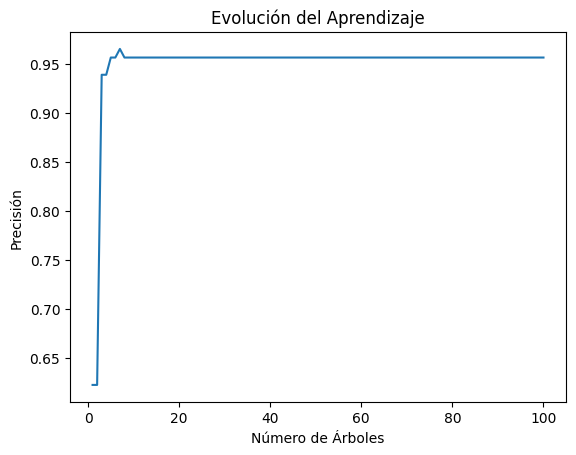

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# Obtener errores por iteración
test_score = []
for i, y_pred in enumerate(gb.staged_predict(X_test)):
    test_score.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 101), test_score)
plt.xlabel('Número de Árboles')
plt.ylabel('Precisión')
plt.title('Evolución del Aprendizaje')
plt.show()

## **4. Extensión a XGBoost**
# 📖 **Notación Matemática Detallada de XGBoost**  

XGBoost (Extreme Gradient Boosting) es una mejora del Gradient Boosting tradicional con optimizaciones clave como:  
- Uso de **segunda derivada** (Hessian) para una mejor optimización.  
- Regularización L1/L2 para evitar overfitting.  
- Manejo eficiente de datos faltantes.  

A continuación, desglosamos su notación formal.

---

## 📌 **Problema General de Optimización**  
Dado un dataset con $ N $ muestras y $ d$ características:  

$
D = \{(x_i, y_i)\}_{i=1}^{N}, \quad x_i \in \mathbb{R}^{d}, \quad y_i \in \mathbb{R}
$

Queremos construir un modelo basado en **M árboles de decisión**, donde la predicción final es la suma de las predicciones de cada árbol $ f_m $:

$
\hat{y}_i = F_M(x_i) = \sum_{m=1}^{M} f_m(x_i)
$

Cada $ f_m $ es un **árbol de decisión con pesos en los nodos terminales**.

---

## 📌 **Función Objetivo en XGBoost**  

En Gradient Boosting, el modelo se ajusta minimizando una **función de pérdida** $ L(y, \hat{y}) $. En XGBoost, se optimiza una función con **regularización**:  

$
\mathcal{L} = \sum_{i=1}^{N} L(y_i, \hat{y}_i) + \sum_{m=1}^{M} \Omega(f_m)
$

Donde:  
- $ L(y, \hat{y}) $ es la pérdida (ej: MSE en regresión o log-loss en clasificación).  
- $ \Omega(f_m) $ es la penalización de la complejidad del modelo.

### 🔹 **Regularización de los Árboles**  
Para controlar la complejidad de los árboles, se usa la regularización:

$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j} w_j^2
$

Donde:  
- $ T $ es el número de hojas del árbol.  
- $ w_j $ son los valores de predicción en las hojas.  
- $ \gamma $ penaliza el número de hojas (favorece árboles pequeños).  
- $ \lambda $ controla la magnitud de los valores \( w_j \) (similar a Ridge Regression).  

---


---

## 📌 **Comparación con Gradient Boosting Tradicional**  

| **Aspecto**             | **Gradient Boosting**  | **XGBoost** |
|-------------------------|-----------------------|-------------|
| **Optimización**        | Gradiente (1ª derivada) | Gradiente + Hessiano (2ª derivada) |
| **Regularización**      | No incluida           | L1/L2 (Ridge + Lasso) |
| **Manejo de Missing**   | Imputación manual     | Automático (Weighted Quantile Sketch) |
| **Velocidad**           | Lento                 | Rápido (paralelización y compresión) |
| **Paralelismo**         | Limitado              | Completo |
| **Early stopping**      | No                    | Sí |
---


## 📌 **Código en Python**  



In [ ]:
!pip install xgboost

In [11]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar datos
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, reg_lambda=1.0)
xgb_model.fit(X_train, y_train)

# Evaluación
y_pred = xgb_model.predict(X_test)
print(f"Precisión XGBoost: {accuracy_score(y_test, y_pred):.2%}")


Precisión XGBoost: 95.61%


En **XGBoost**, el formato DMatrix es una estructura de datos optimizada para mejorar la eficiencia en almacenamiento y velocidad de entrenamiento. Se usa en lugar de los arrays de NumPy o DataFrames de pandas porque:

✅ Reduce el uso de memoria mediante compresión.
✅ Optimiza cálculos para entrenamiento paralelo.
✅ Maneja valores faltantes automáticamente.

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convertir datos a formato DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'reg_lambda': 1.0,
    'eval_metric': 'error'
}

# Entrenamiento
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtest, 'test')],
    early_stopping_rounds=10
)

# Predecir
y_pred = model.predict(dtest)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]
print(f"Precisión XGBoost: {accuracy_score(y_test, y_pred_binary):.2%}")

[0]	test-error:0.37719
[1]	test-error:0.37719
[2]	test-error:0.07895
[3]	test-error:0.05263
[4]	test-error:0.03509
[5]	test-error:0.03509
[6]	test-error:0.03509
[7]	test-error:0.03509
[8]	test-error:0.03509
[9]	test-error:0.03509
[10]	test-error:0.03509
[11]	test-error:0.04386
[12]	test-error:0.03509
[13]	test-error:0.03509
Precisión XGBoost: 96.49%



## **5. Ejercicio Práctico**

**Consigna:**
1. Descargar el dataset MNIST (`from sklearn.datasets import fetch_openml`)
2. Implementar ambos modelos:
   - `GradientBoostingClassifier` de scikit-learn
   - `XGBClassifier` de XGBoost
3. Comparar:
   - Precisión en test
   - Tiempo de entrenamiento
   - Efecto de variar `max_depth` (3 vs 6) y `learning_rate` (0.1 vs 0.3)

**Solución sugerida:**



In [12]:
# [Aquí iría el código completo de tu solución]




## **6. Consejos Avanzados**

1. **Para evitar overfitting:**
   - Reducir `max_depth`
   - Aumentar `reg_lambda` (XGBoost)
   - Usar early stopping

2. **Optimización de hiperparámetros:**
   ```python
   from sklearn.model_selection import GridSearchCV
   
   param_grid = {
       'learning_rate': [0.01, 0.1, 0.3],
       'max_depth': [3, 6],
       'n_estimators': [100, 200]
   }
   
   grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
   grid.fit(X_train, y_train)
   print(f"Mejores parámetros: {grid.best_params_}")
   ```

3. **Feature importance:**
   ```python
   xgb.plot_importance(model)
   plt.show()
   ```
